In [1]:
from google.colab import files

In [2]:
files.upload()

Saving CocaCola_Sales_Rawdata.xlsx to CocaCola_Sales_Rawdata.xlsx


{'CocaCola_Sales_Rawdata.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [171]:
data=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [172]:
data.sample(5)

,Quarter,Sales
27,Q4_92,3243.859993
23,Q4_91,2879.000999
9,Q2_88,2313.631996
22,Q3_91,3172.115997
38,Q3_95,4895.000000


In [173]:
data.isna().sum().sum()

0

In [174]:
data['Quarter'][0]

'Q1_86'

In [175]:
quarter=['Q1','Q2','Q3','Q4']
data['quarter']=0
for i in range(0,data.shape[0]):
  n=data['Quarter'][i]
  data['quarter'][i]=n[0:2]

<ipython-input-175-5492f56727de>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['quarter'][i]=n[0:2]


In [176]:
n=data['Quarter'][1]
n

'Q2_86'

In [177]:
data.sample(5)

,Quarter,Sales,quarter
20,Q1_91,2480.973999,Q1
8,Q1_88,1869.049999,Q1
39,Q4_95,4333.000000,Q4
22,Q3_91,3172.115997,Q3
9,Q2_88,2313.631996,Q2


In [178]:
dummy=pd.DataFrame(pd.get_dummies(data['quarter']))

In [179]:
new_data=pd.concat((data,dummy),axis=1)

In [180]:
new_data.sample(5)

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
39,Q4_95,4333.000000,Q4,0,0,0,1
0,Q1_86,1734.827000,Q1,1,0,0,0
33,Q2_94,4342.000000,Q2,0,1,0,0
15,Q4_89,2173.967995,Q4,0,0,0,1
2,Q3_86,2533.804993,Q3,0,0,1,0


In [181]:
new_data['t']=np.arange(1,43)
new_data.head(5)

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t
0,Q1_86,1734.827000,Q1,1,0,0,0,1
1,Q2_86,2244.960999,Q2,0,1,0,0,2
2,Q3_86,2533.804993,Q3,0,0,1,0,3
3,Q4_86,2154.962997,Q4,0,0,0,1,4
4,Q1_87,1547.818996,Q1,1,0,0,0,5


In [182]:
# for i in range(1,data.shape[0]):
#     new_data['t_square'] = data['t'][i]
# new_data.head(5)
t2=[]
for i in range(1,data.shape[0]+1):
  t2.append(i**2)

In [183]:
new_data=pd.concat([new_data,pd.DataFrame(t2,index=new_data.index,columns=['t2'])],axis=1)

In [184]:
new_data.head(5)

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t2
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25


In [185]:
log_sales=np.log(new_data['Sales'])
new_data['log_sales']=log_sales

In [209]:
new_data.sample(5)

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t2,log_sales
37,Q2_95,4936.000000,Q2,0,1,0,0,38,1444,8.504311
18,Q3_90,2792.753998,Q3,0,0,1,0,19,361,7.934783
15,Q4_89,2173.967995,Q4,0,0,0,1,16,256,7.684309
30,Q3_93,3629.000000,Q3,0,0,1,0,31,961,8.196712
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791


In [187]:
train=new_data.head(data.shape[0]-10)

In [188]:
train.shape[0]

32

In [189]:
test=new_data.head(data.shape[0]-train.shape[0])

<Axes: >

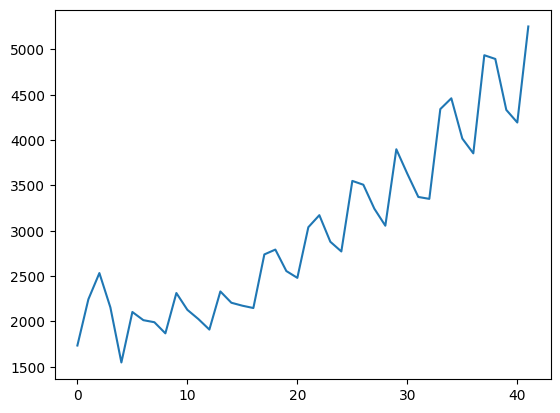

In [190]:
data.Sales.plot()

In [191]:
#1linear midel
model_linear=smf.ols('Sales~t',data=train).fit()
pred_lin=pd.Series(model_linear.predict(pd.DataFrame(test['t'])))
RMSELin=np.sqrt((np.mean(np.array(test['Sales'])-np.array(pred_lin))**2))
RMSELin

109.62794167380181

In [192]:
#2 Quadratic Model
model_quad=smf.ols('Sales~t+pow(t,2)',data=train).fit()
pred_quad=pd.Series(model_quad.predict(pd.DataFrame(test[['t','t2']])))
RMSE_quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_quad))**2))
RMSE_quad

274.0542045824196

In [193]:
#3 Exponential Model
model_expo=smf.ols('log_sales~t',data=train).fit()
pred_exp=pd.Series(model_expo.predict(pd.DataFrame(test['t'])))
RMSE_exp=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2))
RMSE_exp

310.1846957586862

In [194]:
#4 Additive seasibality
Add_season=smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_add_season=pd.Series(Add_season.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
RMSE_add_seas=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_season))**2))
RMSE_add_seas

522.2023962258507

In [195]:
#5 Additive with Seasonality with linear trend
add_linear=smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
pred_add_lin=pd.Series(add_linear.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
RMSE_add_lin=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_lin))**2))
RMSE_add_lin

267.8435253810589

In [196]:
#6 additive seasonlity with quadratic trend
quad_seasonlity=smf.ols('Sales~t+t2+Q1+Q2+Q3+Q4',data=train).fit()
pred_quad_seasonlity=pd.Series(quad_seasonlity.predict(pd.DataFrame(test[['t','t2','Q1','Q2','Q3','Q4']])))
RMSE_pred_quad_seasonlity=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_quad_seasonlity))**2))
RMSE_pred_quad_seasonlity

170.9407605534501

In [197]:
#7 multiplicative seasonality
multi_seas=smf.ols('log_sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_multi_seas=pd.Series(multi_seas.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
RMSE_pred_multi_seas=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_multi_seas)))**2))
RMSE_pred_multi_seas

466.5151627118033

In [198]:
#8 multiplicative seasonality with linear trend
multi_lin=smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data=train).fit()
pred_multi_lin=pd.Series(multi_lin.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
RMSE_pred_multi_lin=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_multi_lin)))**2))
RMSE_pred_multi_lin

231.3313083622452

In [199]:
#9 multiplicative seasonality with quadratic trend
multi_quad=smf.ols('log_sales~t+t2+Q1+Q2+Q3+Q4',data=train).fit()
pred_multi_quad=pd.Series(multi_quad.predict(test[['t','t2','Q1','Q2','Q3','Q4']]))
RMSE_multi_quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_multi_quad)))**2))
RMSE_multi_quad

177.65190967824253

In [200]:
#Creating table for all RMSE
RMSE={'Model':pd.Series(['RMSELin','RMSE_quad','RMSE_exp','RMSE_add_seas','RMSE_add_lin','RMSE_pred_quad_seasonlity','RMSE_pred_multi_seas','RMSE_pred_multi_lin','RMSE_multi_quad']),
'Values':pd.Series([RMSELin,RMSE_quad,RMSE_exp,RMSE_add_seas,RMSE_add_lin,RMSE_pred_quad_seasonlity,RMSE_pred_multi_seas,RMSE_pred_multi_lin,RMSE_multi_quad])}

In [201]:
RMSE

{'Model': 0                      RMSELin
 1                    RMSE_quad
 2                     RMSE_exp
 3                RMSE_add_seas
 4                 RMSE_add_lin
 5    RMSE_pred_quad_seasonlity
 6         RMSE_pred_multi_seas
 7          RMSE_pred_multi_lin
 8              RMSE_multi_quad
 dtype: object,
 'Values': 0    109.627942
 1    274.054205
 2    310.184696
 3    522.202396
 4    267.843525
 5    170.940761
 6    466.515163
 7    231.331308
 8    177.651910
 dtype: float64}

In [202]:
coco_data=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [215]:
#Final model 'Sales~t+Q1+Q2+Q3+Q4'
final_model=smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data=train).fit()
pred=pd.Series(final_model.predict(test))
actual_predict=np.exp(pred)
actual_predict

0    1581.989196
1    2009.691775
2    1989.007180
3    1851.307210
4    1723.639105
5    2189.637793
6    2167.101118
7    2017.071615
8    1877.972221
9    2385.696019
dtype: float64

In [213]:
test['Sales']

0    1734.827000
1    2244.960999
2    2533.804993
3    2154.962997
4    1547.818996
5    2104.411995
6    2014.362999
7    1991.746998
8    1869.049999
9    2313.631996
Name: Sales, dtype: float64